In [23]:
import yfinance as yf
import pandas as pd

df = pd.read_csv("../data/processed/spy_labeled.csv", parse_dates=["Date"])
df = df.reset_index(drop=True)   # ensures Date is a column, not the index


df.head()

,Date,Close,High,Low,Open,Volume,return_1d,y
0,2010-01-04,85.515656,85.560928,84.142335,84.791267,118944600,0.002647,1
1,2010-01-05,85.742020,85.779751,85.153454,85.462832,111579900,0.000704,1
2,2010-01-06,85.802368,86.013647,85.591089,85.658998,116074400,0.004221,1
3,2010-01-07,86.164558,86.270198,85.402439,85.643902,131091100,0.003328,1
4,2010-01-08,86.451294,86.489025,85.764637,85.938185,126402800,0.001396,1


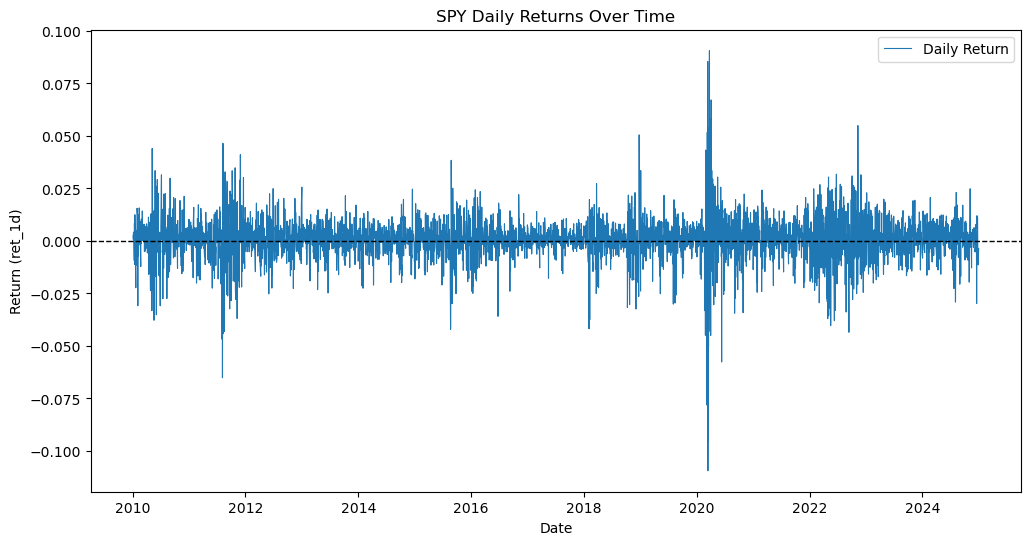

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["return_1d"], label="Daily Return", linewidth=0.8)

plt.axhline(0, color="black", linewidth=1, linestyle="--") 
plt.title("SPY Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Return (ret_1d)")
plt.legend()
plt.show()

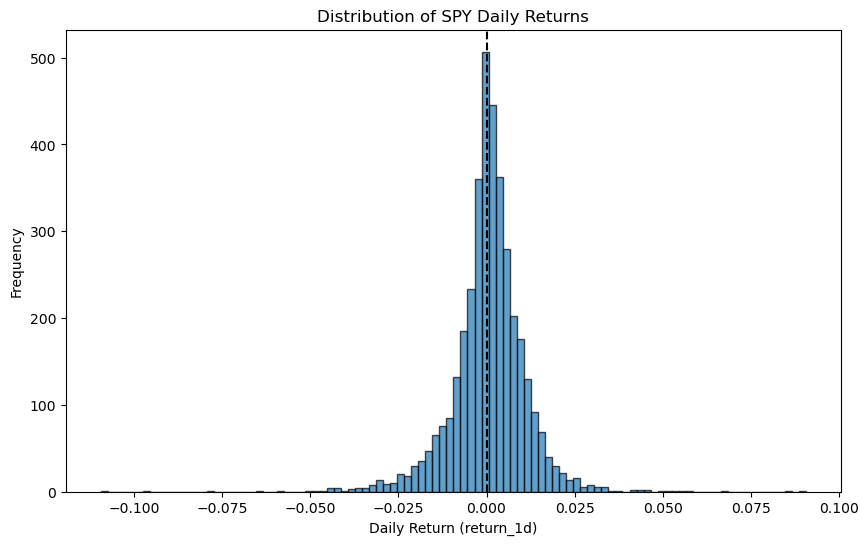

In [29]:
plt.figure(figsize=(10,6))
plt.hist(df["return_1d"], bins=100, edgecolor="k", alpha=0.7)

plt.axvline(0, color="black", linestyle="--")
plt.title("Distribution of SPY Daily Returns")
plt.xlabel("Daily Return (return_1d)")
plt.ylabel("Frequency")
plt.show()

In [30]:
# Past-looking returns (features)
df["ret_1d"]  = df["Close"].pct_change(1)
df["ret_5d"]  = df["Close"].pct_change(5)
df["ret_10d"] = df["Close"].pct_change(10)

# Optional: classic “momentum” form (same info as ret_5d)
df["mom_5d"] = df["Close"] / df["Close"].shift(5) - 1

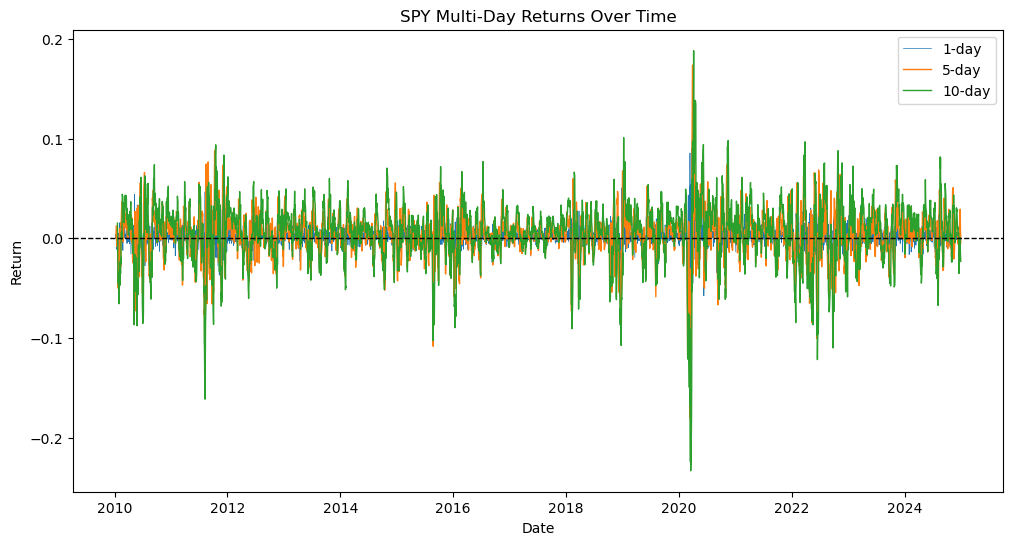

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["ret_1d"],  linewidth=0.5, label="1-day")
plt.plot(df["Date"], df["ret_5d"],  linewidth=1.0, label="5-day")
plt.plot(df["Date"], df["ret_10d"], linewidth=1.0, label="10-day")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("SPY Multi-Day Returns Over Time")
plt.xlabel("Date"); plt.ylabel("Return")
plt.legend(); plt.show()


<Figure size 700x500 with 0 Axes>

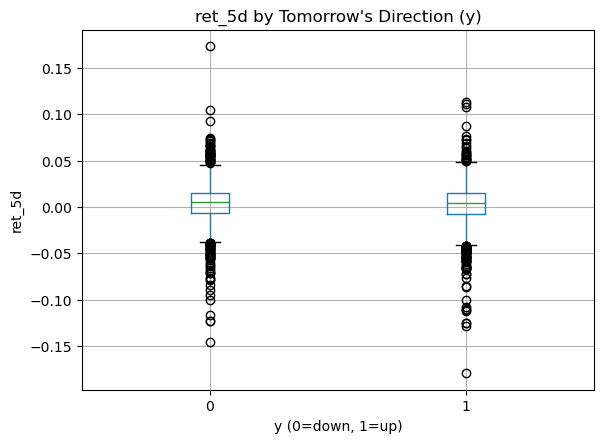

In [37]:
plt.figure(figsize=(7,5))
df.boxplot(column="ret_5d", by="y")
plt.title("ret_5d by Tomorrow's Direction (y)"); plt.suptitle("")
plt.xlabel("y (0=down, 1=up)"); plt.ylabel("ret_5d"); plt.show()

In [38]:
print(df[["ret_1d","ret_5d","ret_10d","mom_5d"]].describe())

print("\nClass-conditional means:")
print(df.groupby("y")[["ret_1d","ret_5d","ret_10d"]].mean())

print("\nCorrelation with y:")
print(df[["ret_1d","ret_5d","ret_10d","mom_5d"]].corrwith(df["y"]).sort_values(ascending=False))

            ret_1d       ret_5d      ret_10d       mom_5d
count  3772.000000  3768.000000  3763.000000  3768.000000
mean      0.000568     0.002819     0.005602     0.002819
std       0.010742     0.022386     0.030307     0.022386
min      -0.109424    -0.179693    -0.232884    -0.179693
25%      -0.003709    -0.006923    -0.008150    -0.006923
50%       0.000686     0.004552     0.008360     0.004552
75%       0.005790     0.014930     0.023103     0.014930
max       0.090603     0.173581     0.187979     0.173581

Class-conditional means:
     ret_1d    ret_5d   ret_10d
y                              
0  0.000887  0.003353  0.005992
1  0.000309  0.002385  0.005285

Correlation with y:
ret_10d   -0.011596
ret_5d    -0.021515
mom_5d    -0.021515
ret_1d    -0.026772
dtype: float64


In [39]:
df.to_csv("../data/processed/spy_features_step3.csv", index=False)